In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Assign Url
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

In [22]:
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [23]:
df = EA.clean(df)

In [24]:
Att_df = EA.Att_df(df)

In [25]:
Att_df

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,percentsalaryhike,monthlyincome,jobsatisfaction,performancerating,overtime,distancefromhome,businesstravel,attrition
employeenumber,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,11,5993,4,3,yes,1,travel_rarely,yes
2,49,male,married,life sciences,research & development,research scientist,2,1,23,5130,2,4,no,8,travel_frequently,no
4,37,male,single,other,research & development,laboratory technician,1,6,15,2090,3,3,yes,2,travel_rarely,yes
5,33,female,married,life sciences,research & development,research scientist,1,1,11,2909,3,3,yes,3,travel_frequently,no
7,27,male,married,medical,research & development,laboratory technician,1,9,12,3468,2,3,no,2,travel_rarely,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,male,married,medical,research & development,laboratory technician,2,4,17,2571,4,3,no,23,travel_frequently,no
2062,39,male,married,medical,research & development,healthcare representative,3,4,15,9991,1,3,no,6,travel_rarely,no
2064,27,male,married,life sciences,research & development,manufacturing director,2,1,20,6142,2,4,yes,4,travel_rarely,no


In [26]:
Att_df.reset_index(drop=True, inplace=True)

In [27]:
order_list = [  ['female', 'male'],
              
                ['single', 'married', 'divorced'],

                ['marketing',
                'medical',
                'life sciences',
                'technical degree',
                'human resources',
                'other'
                ],

                ['sales', 'research & development', 'human resources'],

                ['sales representative',
                'laboratory technician',
                'research scientist',
                'human resources',
                'sales executive',
                'manufacturing director',
                'healthcare representative',
                'research director',
                'manager'],

                ['no', 'yes'],

                ['non-travel','travel_rarely','travel_frequently'],


                ['no', 'yes']]

In [28]:
col_ord_list = Att_df.columns.values.tolist()
col_ord_list

['age',
 'gender',
 'maritalstatus',
 'educationfield',
 'department',
 'jobrole',
 'joblevel',
 'numcompaniesworked',
 'percentsalaryhike',
 'monthlyincome',
 'jobsatisfaction',
 'performancerating',
 'overtime',
 'distancefromhome',
 'businesstravel',
 'attrition']

In [29]:
Att_df.select_dtypes(include=['object'])

,gender,maritalstatus,educationfield,department,jobrole,overtime,businesstravel,attrition
0,female,single,life sciences,sales,sales executive,yes,travel_rarely,yes
1,male,married,life sciences,research & development,research scientist,no,travel_frequently,no
2,male,single,other,research & development,laboratory technician,yes,travel_rarely,yes
3,female,married,life sciences,research & development,research scientist,yes,travel_frequently,no
4,male,married,medical,research & development,laboratory technician,no,travel_rarely,no
...,...,...,...,...,...,...,...,...
1465,male,married,medical,research & development,laboratory technician,no,travel_frequently,no
1466,male,married,medical,research & development,healthcare representative,no,travel_rarely,no
1467,male,married,life sciences,research & development,manufacturing director,yes,travel_rarely,no
1468,male,married,medical,sales,sales executive,no,travel_frequently,no


In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=order_list,dtype='int')
En_df = pd.DataFrame(oe.fit_transform(
                        Att_df.select_dtypes(include=['object'])
                        )
            ,columns=oe.get_feature_names_out())
En_df

,gender,maritalstatus,educationfield,department,jobrole,overtime,businesstravel,attrition
0,0,0,2,0,4,1,1,1
1,1,1,2,1,2,0,2,0
2,1,0,5,1,1,1,1,1
3,0,1,2,1,2,1,2,0
4,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1465,1,1,1,1,1,0,2,0
1466,1,1,1,1,6,0,1,0
1467,1,1,2,1,5,1,1,0
1468,1,1,1,0,4,0,2,0


In [31]:
Att_df.select_dtypes(exclude=['object']).drop(columns=['joblevel','performancerating'])

,age,numcompaniesworked,percentsalaryhike,monthlyincome,jobsatisfaction,distancefromhome
0,41,8,11,5993,4,1
1,49,1,23,5130,2,8
2,37,6,15,2090,3,2
3,33,1,11,2909,3,3
4,27,9,12,3468,2,2
...,...,...,...,...,...,...
1465,36,4,17,2571,4,23
1466,39,4,15,9991,1,6
1467,27,1,20,6142,2,4
1468,49,2,14,5390,2,2


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = pd.DataFrame(
            scaler.fit_transform(
                Att_df.select_dtypes(exclude=['object']).drop(columns=['joblevel','performancerating'])
            ),
            columns=scaler.get_feature_names_out()
)
Scaled_df

,age,numcompaniesworked,percentsalaryhike,monthlyincome,jobsatisfaction,distancefromhome
0,0.446350,2.125136,-1.150554,-0.108350,1.153254,-1.010909
1,1.322365,-0.678049,2.129306,-0.291719,-0.660853,-0.147150
2,0.008343,1.324226,-0.057267,-0.937654,0.246200,-0.887515
3,-0.429664,-0.678049,-1.150554,-0.763634,0.246200,-0.764121
4,-1.086676,2.525591,-0.877232,-0.644858,-0.660853,-0.887515
...,...,...,...,...,...,...
1465,-0.101159,0.523316,0.489376,-0.835451,1.153254,1.703764
1466,0.227347,0.523316,-0.057267,0.741140,-1.567907,-0.393938
1467,-1.086676,-0.678049,1.309341,-0.076690,-0.660853,-0.640727
1468,1.322365,-0.277594,-0.330589,-0.236474,-0.660853,-0.887515


In [33]:
FE_df = pd.concat([
            En_df,
            Scaled_df,
            Att_df[['joblevel','performancerating']]
        ],axis=1)

FE_df = FE_df[col_ord_list]
FE_df

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,percentsalaryhike,monthlyincome,jobsatisfaction,performancerating,overtime,distancefromhome,businesstravel,attrition
0,0.446350,0,0,2,0,4,2,2.125136,-1.150554,-0.108350,1.153254,3,1,-1.010909,1,1
1,1.322365,1,1,2,1,2,2,-0.678049,2.129306,-0.291719,-0.660853,4,0,-0.147150,2,0
2,0.008343,1,0,5,1,1,1,1.324226,-0.057267,-0.937654,0.246200,3,1,-0.887515,1,1
3,-0.429664,0,1,2,1,2,1,-0.678049,-1.150554,-0.763634,0.246200,3,1,-0.764121,2,0
4,-1.086676,1,1,1,1,1,1,2.525591,-0.877232,-0.644858,-0.660853,3,0,-0.887515,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1,1,1,1,1,2,0.523316,0.489376,-0.835451,1.153254,3,0,1.703764,2,0
1466,0.227347,1,1,1,1,6,3,0.523316,-0.057267,0.741140,-1.567907,3,0,-0.393938,1,0
1467,-1.086676,1,1,2,1,5,2,-0.678049,1.309341,-0.076690,-0.660853,4,1,-0.640727,1,0
1468,1.322365,1,1,1,0,4,2,-0.277594,-0.330589,-0.236474,-0.660853,3,0,-0.887515,2,0


In [34]:
x = FE_df.drop(columns=['attrition'])
y = FE_df['attrition']

In [35]:
x

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,percentsalaryhike,monthlyincome,jobsatisfaction,performancerating,overtime,distancefromhome,businesstravel
0,0.446350,0,0,2,0,4,2,2.125136,-1.150554,-0.108350,1.153254,3,1,-1.010909,1
1,1.322365,1,1,2,1,2,2,-0.678049,2.129306,-0.291719,-0.660853,4,0,-0.147150,2
2,0.008343,1,0,5,1,1,1,1.324226,-0.057267,-0.937654,0.246200,3,1,-0.887515,1
3,-0.429664,0,1,2,1,2,1,-0.678049,-1.150554,-0.763634,0.246200,3,1,-0.764121,2
4,-1.086676,1,1,1,1,1,1,2.525591,-0.877232,-0.644858,-0.660853,3,0,-0.887515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1,1,1,1,1,2,0.523316,0.489376,-0.835451,1.153254,3,0,1.703764,2
1466,0.227347,1,1,1,1,6,3,0.523316,-0.057267,0.741140,-1.567907,3,0,-0.393938,1
1467,-1.086676,1,1,2,1,5,2,-0.678049,1.309341,-0.076690,-0.660853,4,1,-0.640727,1
1468,1.322365,1,1,1,0,4,2,-0.277594,-0.330589,-0.236474,-0.660853,3,0,-0.887515,2


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    'KNeighborsClassifier' : KNeighborsClassifier()

}

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       913
           1       0.39      0.76      0.52       189

    accuracy                           0.76      1102
   macro avg       0.67      0.76      0.68      1102
weighted avg       0.84      0.76      0.78      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       320
           1       0.27      0.62      0.37        48

    accuracy                           0.73       368
   macro avg       0.60      0.68      0.60       368
weighted avg       0.84      0.73      0.77       368

----------------------

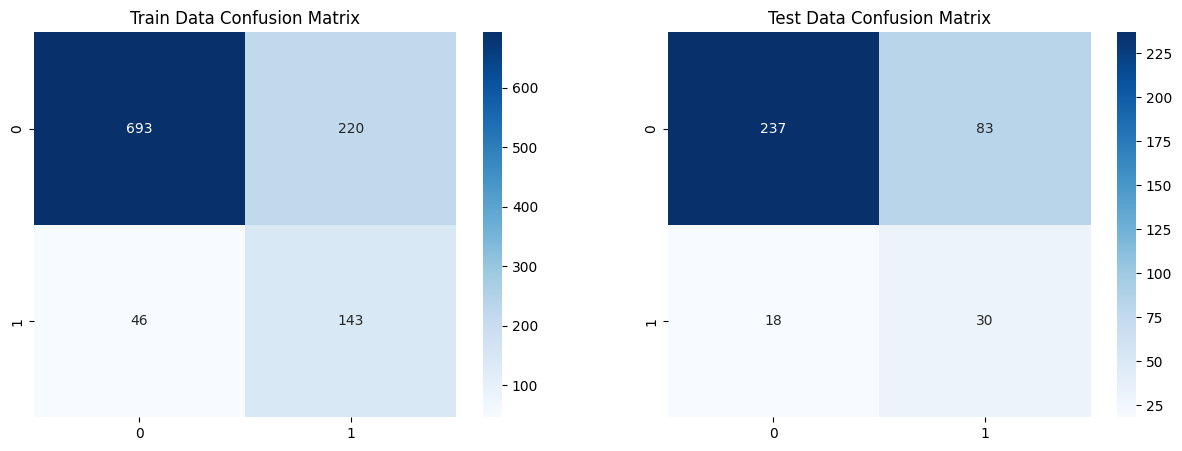

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       189

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       320
           1       0.31      0.33      0.32        48

    accuracy                           0.82       368
   macro avg       0.61      0.61      0.61       3

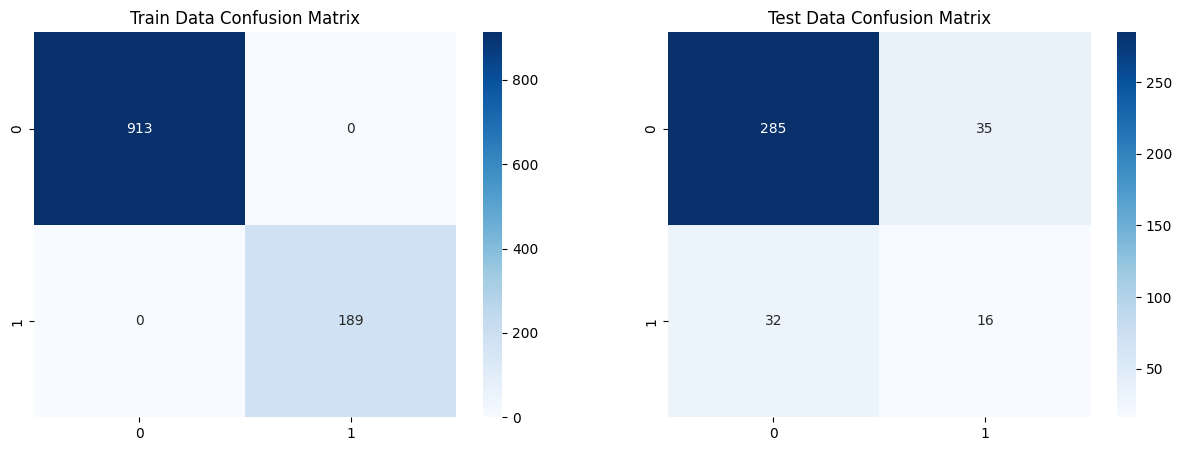

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       189

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       3

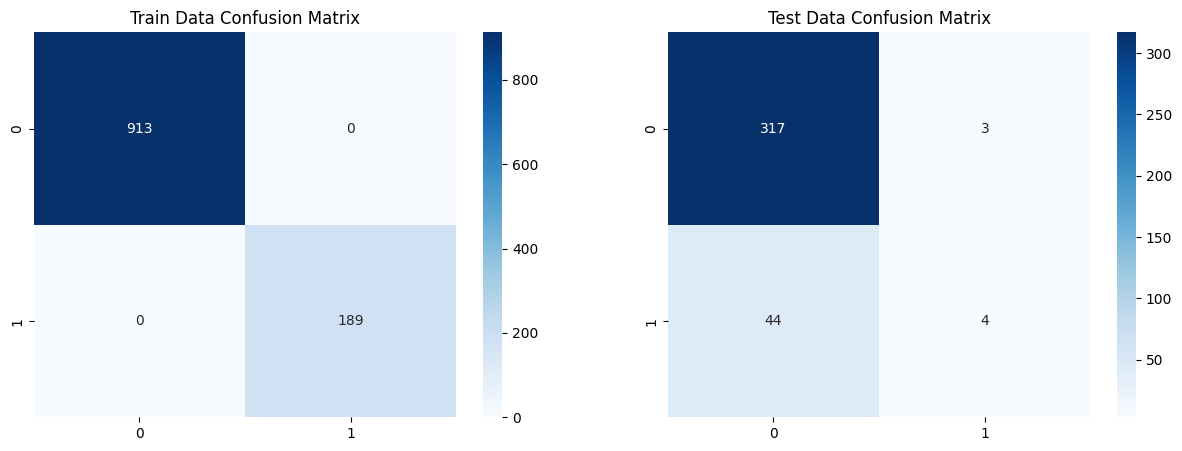

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       913
           1       0.47      0.79      0.59       189

    accuracy                           0.81      1102
   macro avg       0.71      0.81      0.74      1102
weighted avg       0.87      0.81      0.83      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.93      0.78      0.84       320
           1       0.29      0.60      0.39        48

    accuracy                           0.75       368
   macro avg       0.61      0.69      0.62       368
weighted avg    

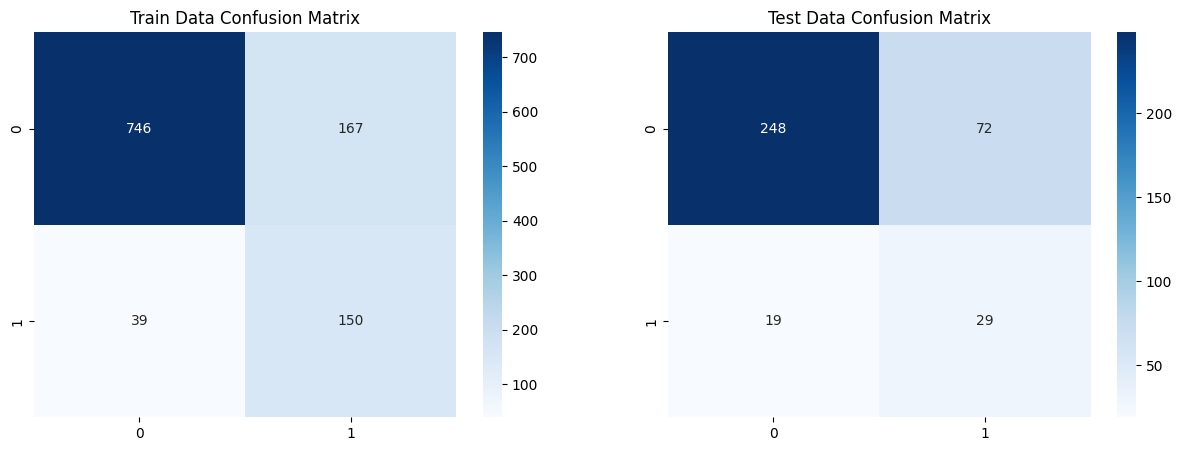

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       913
           1       0.54      0.56      0.55       189

    accuracy                           0.84      1102
   macro avg       0.72      0.73      0.73      1102
weighted avg       0.84      0.84      0.84      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       320
           1       0.37      0.35      0.36        48

    accuracy                           0.84       368
   macro avg       0.64      0.63      0.63       368
weighted 

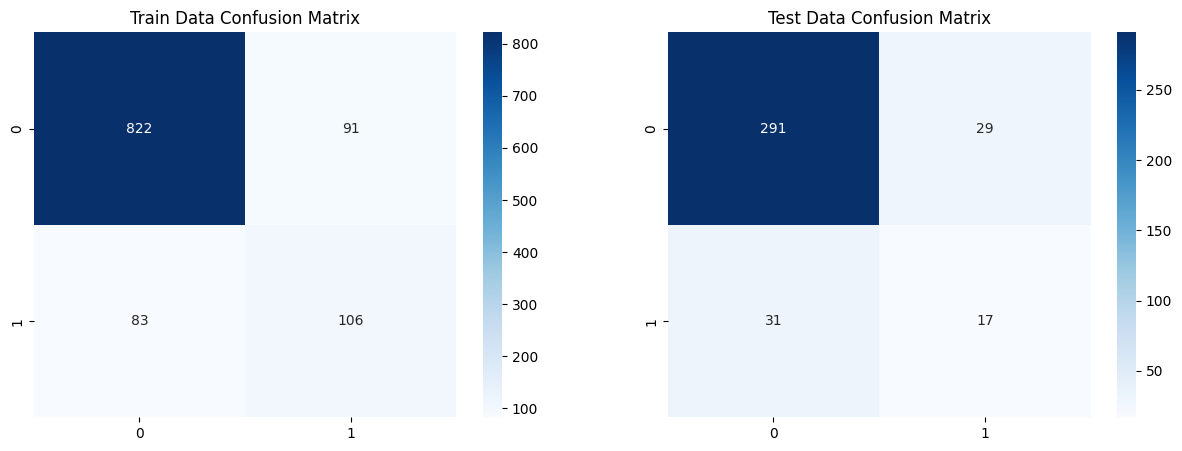

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       913
           1       0.80      0.27      0.40       189

    accuracy                           0.86      1102
   macro avg       0.83      0.63      0.66      1102
weighted avg       0.86      0.86      0.83      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.42      0.10      0.17        48

    accuracy                           0.86       368
   macro avg       0.65      0.54      0.55       368

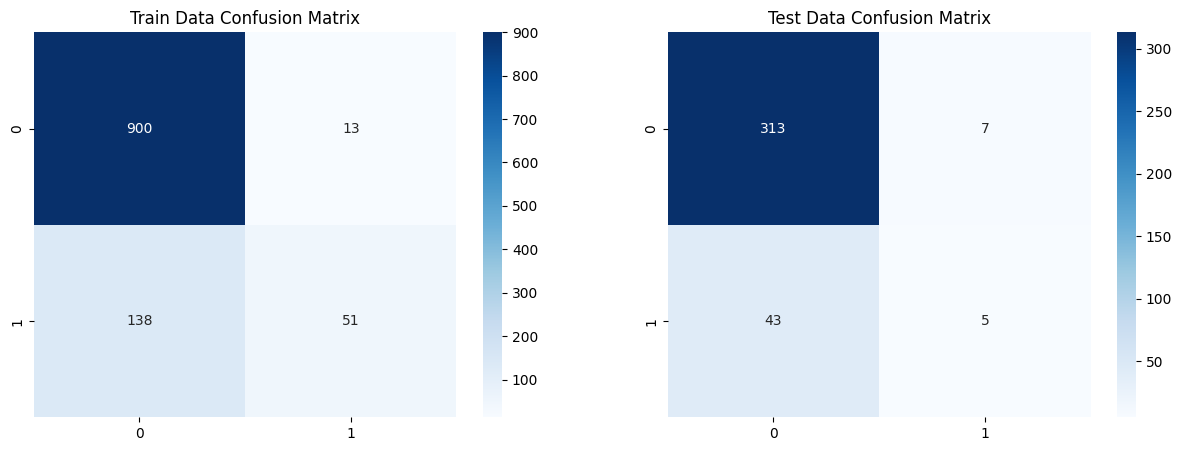

***************************************************************************


In [40]:
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')

In [41]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       913
           1       0.69      0.34      0.46       189

    accuracy                           0.86      1102
   macro avg       0.78      0.66      0.69      1102
weighted avg       0.85      0.86      0.84      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       320
           1       0.42      0.21      0.28        48

    accuracy                           0.86       368
   macro avg       0.65      0.58      0.60       368
weighted avg       0.83      0.86      0.84       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

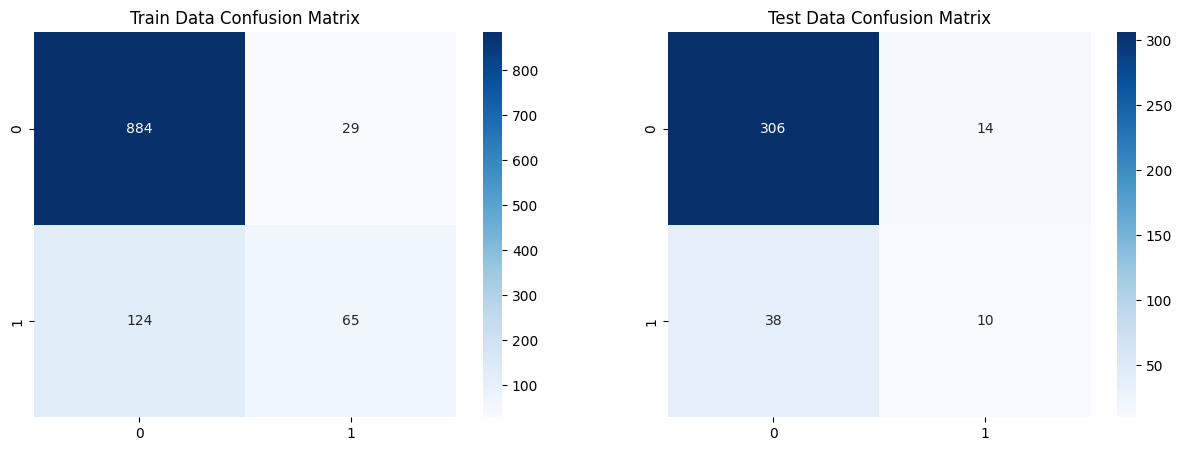

In [43]:
print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')